/tmp/ipykernel_2176127/2145950201.py:30: RuntimeWarning: invalid value encountered in cos
  new_pos_A = pos_A + step_size * np.array([np.cos(move_angle), np.sin(move_angle)])
/tmp/ipykernel_2176127/2145950201.py:30: RuntimeWarning: invalid value encountered in sin
  new_pos_A = pos_A + step_size * np.array([np.cos(move_angle), np.sin(move_angle)])


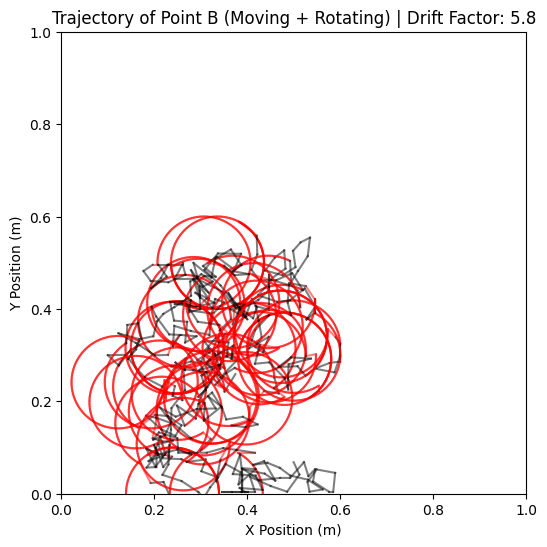

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
env_size = 0.5  # 1m x 1m environment
stick_length = 0.1  # 0.1m stick
time_steps = 1000  # Number of steps in the simulation
move_prob = 0.9  # Probability of moving instead of rotating
rotation_steps = 150  # Fixed rotation steps when stationary
drift_factor = 5.8  # Controls how much the movement direction drifts (0 = random, 1 = smooth)

# Initialize positions
pos_A = np.array([np.random.uniform(0, env_size), np.random.uniform(0, env_size)])
angle = np.random.uniform(0, 2 * np.pi)  # Initial angle
pos_B = pos_A + stick_length * np.array([np.cos(angle), np.sin(angle)])

# Initialize movement direction
move_angle = np.random.uniform(0, 2 * np.pi)

# Store B trajectory and rotation markers
B_trajectory = []
rotation_phases = []

for _ in range(time_steps):
    if np.random.rand() < move_prob:
        # Move in a direction with some drift
        move_angle = (drift_factor * move_angle) + ((1 - drift_factor) * np.random.uniform(0, 2 * np.pi))
        step_size = np.random.uniform(0.02, 0.05)  # Random step size
        
        new_pos_A = pos_A + step_size * np.array([np.cos(move_angle), np.sin(move_angle)])
        
        # Keep within bounds
        new_pos_A = np.clip(new_pos_A, 0, env_size)
        
        # Update A and B positions
        pos_A = new_pos_A
        pos_B = pos_A + stick_length * np.array([np.cos(angle), np.sin(angle)])
        
        B_trajectory.append(pos_B.copy())
        rotation_phases.append(False)  # Movement phase

    else:
        # Rotate B around A
        for _ in range(rotation_steps):
            angle += np.pi / 90  # Small angle increment
            pos_B = pos_A + stick_length * np.array([np.cos(angle), np.sin(angle)])

            B_trajectory.append(pos_B.copy())
            rotation_phases.append(True)  # Rotation phase

# Convert lists to numpy arrays for plotting
B_trajectory = np.array(B_trajectory)
rotation_phases = np.array(rotation_phases)  # Ensure same length

# Plot trajectory of B
fig, ax = plt.subplots(figsize=(6, 6))

# Plot movement in black, rotations in red
for i in range(len(B_trajectory) - 1):
    color = 'red' if rotation_phases[i] else 'black'
    ax.plot(B_trajectory[i:i+2, 0], B_trajectory[i:i+2, 1], color=color, alpha=0.5)

# Labels and limits
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel("X Position (m)")
ax.set_ylabel("Y Position (m)")
ax.set_title(f"Trajectory of Point B (Moving + Rotating) | Drift Factor: {drift_factor}")
plt.show()


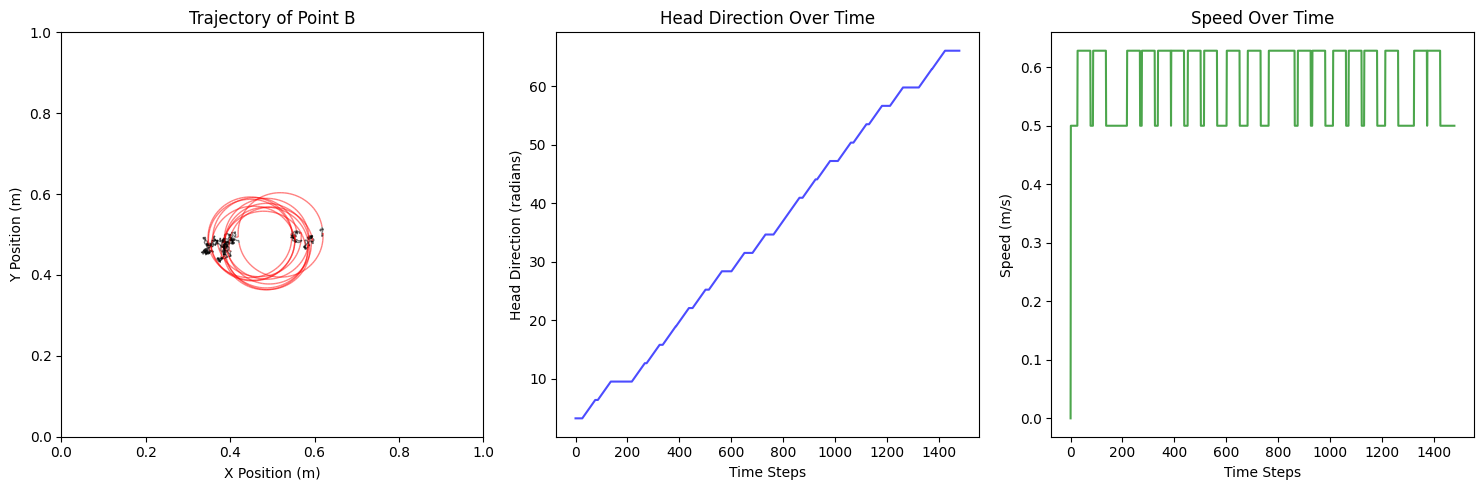

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# Simulation parameters
env_size = 1.0  # 1m x 1m environment
stick_length = 0.1  # 0.1m stick
total_time = 1  # Total simulation time in seconds
dt = 0.01  # Time step = 10 ms
time_steps = int(total_time / dt)  # Convert total time to number of steps

move_prob = 0.95  # Probability of moving instead of rotating
rotation_steps = 50  # Fixed number of rotation steps per rotation phase
drift_factor = 0.0  # Controls movement drift (0 = random, 1 = smooth)

# Initialize positions at the center of the environment
pos_A = np.array([env_size / 2, env_size / 2])
angle = np.random.uniform(0, 2 * np.pi)  # Initial angle
pos_B = pos_A + stick_length * np.array([np.cos(angle), np.sin(angle)])

# Initialize movement direction
move_angle = np.random.uniform(0, 2 * np.pi)
velocity = 0.5 # Speed in m/s

# Store B trajectory and rotation markers
B_trajectory = []
rotation_phases = []

for _ in range(time_steps):
    if np.random.rand() < move_prob:
        # Move in a direction with drift control
        move_angle = (drift_factor * move_angle) + ((1 - drift_factor) * np.random.uniform(0, 2 * np.pi))
        step_size = velocity * dt  # Distance moved per time step
        
        new_pos_A = pos_A + step_size * np.array([np.cos(move_angle), np.sin(move_angle)])
        
        # Keep within bounds
        new_pos_A = np.clip(new_pos_A, 0, env_size)
        
        # Update A and B positions
        pos_A = new_pos_A
        pos_B = pos_A + stick_length * np.array([np.cos(angle), np.sin(angle)])
        
        B_trajectory.append(pos_B.copy())
        rotation_phases.append(False)  # Movement phase

    else:
        # Rotate B around A
        for _ in range(rotation_steps):
            angle += np.pi / 50  # Small angle increment per rotation step
            pos_B = pos_A + stick_length * np.array([np.cos(angle), np.sin(angle)])

            B_trajectory.append(pos_B.copy())
            rotation_phases.append(True)  # Rotation phase

# Convert lists to numpy arrays for plotting
B_trajectory = np.array(B_trajectory)
rotation_phases = np.array(rotation_phases)  # Ensure same length

# Optimize plotting using LineCollection
segments = np.array([[B_trajectory[i], B_trajectory[i + 1]] for i in range(len(B_trajectory) - 1)])
colors = ['red' if rotation_phases[i] else 'black' for i in range(len(B_trajectory) - 1)]

fig, ax = plt.subplots(figsize=(6, 6))

# Create a LineCollection for faster plotting
lc = LineCollection(segments, colors=colors, linewidths=1, alpha=0.5)
ax.add_collection(lc)

# Set axis limits
ax.set_xlim(0, env_size)
ax.set_ylim(0, env_size)

# Labels and title
ax.set_xlabel("X Position (m)")
ax.set_ylabel("Y Position (m)")
ax.set_title(f"Trajectory of Point B (Moving + Rotating) | dt = {dt} s")

plt.show()


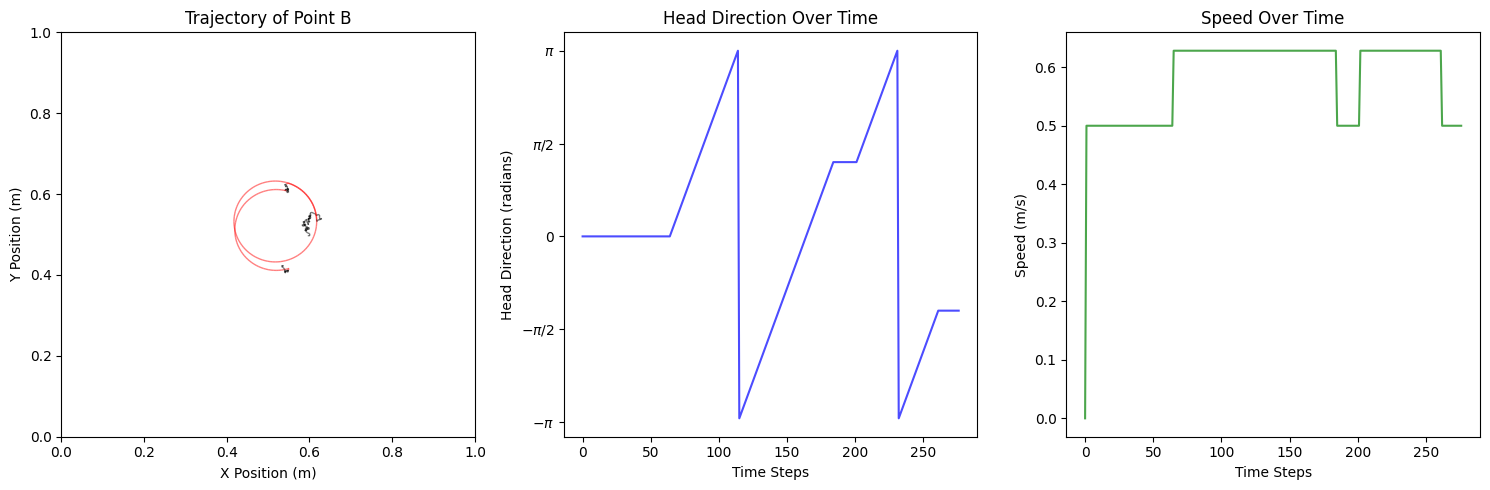

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

def simulate_rat_movement(total_time=1, dt=0.01, move_prob=0.95, drift_factor=0.0, velocity=0.5, rotation_steps=60):
    """
    Simulates rat-like movement where a point (B) moves with random walks and rotations around a base point (A).
    
    Parameters:
        total_time (float): Total simulation time in seconds.
        dt (float): Time step size in seconds.
        move_prob (float): Probability of movement instead of rotation.
        drift_factor (float): Controls movement direction drift (0 = fully random, 1 = smooth drift).
        velocity (float): Speed of movement in m/s.
        rotation_steps (int): Number of steps per rotation phase.
    
    Returns:
        B_trajectory (numpy array): Nx2 array of (x, y) positions of B.
        head_directions (numpy array): Head direction angles (in radians), wrapped between -π and π.
        speeds (numpy array): Speed of B at each time step (in m/s).
        rotation_phases (numpy array): Boolean array marking rotation phases.
    """
    # Environment parameters
    env_size = 1.0  # 1m x 1m environment
    stick_length = 0.1  # 0.1m stick (hip-to-head distance)
    time_steps = int(total_time / dt)  # Convert total time to number of steps

    # Initialize positions at the center of the environment
    pos_A = np.array([env_size / 2, env_size / 2])
    # angle = np.random.uniform(-np.pi, np.pi)  # Initial head direction
    angle = 0 # Initial head direction  
    pos_B = pos_A + stick_length * np.array([np.cos(angle), np.sin(angle)])

    # Initialize movement direction
    move_angle = np.random.uniform(-np.pi, np.pi)

    # Store B trajectory, head directions, and movement markers
    B_trajectory = []
    head_directions = []
    rotation_phases = []

    for _ in range(time_steps):
        if np.random.rand() < move_prob:
            # Move in a direction with drift control
            move_angle = (drift_factor * move_angle) + ((1 - drift_factor) * np.random.uniform(-np.pi, np.pi))
            step_size = velocity * dt  # Distance moved per time step

            new_pos_A = pos_A + step_size * np.array([np.cos(move_angle), np.sin(move_angle)])

            # Keep within bounds
            new_pos_A = np.clip(new_pos_A, 0, env_size)

            # Update A and B positions
            pos_A = new_pos_A
            pos_B = pos_A + stick_length * np.array([np.cos(angle), np.sin(angle)])

            B_trajectory.append(pos_B.copy())
            head_directions.append(angle)
            rotation_phases.append(False)  # Movement phase

        else:
            # Rotate B around A
            for _ in range(rotation_steps):
                angle += np.pi / 50  # Small angle increment per rotation step
                angle = (angle + np.pi) % (2 * np.pi) - np.pi  # Wrap between -π and π
                pos_B = pos_A + stick_length * np.array([np.cos(angle), np.sin(angle)])

                B_trajectory.append(pos_B.copy())
                head_directions.append(angle)
                rotation_phases.append(True)  # Rotation phase

    # Convert lists to numpy arrays for processing
    B_trajectory = np.array(B_trajectory)
    head_directions = np.array(head_directions)
    rotation_phases = np.array(rotation_phases)

    # Wrap head direction angles between -π and π
    head_directions = (head_directions + np.pi) % (2 * np.pi) - np.pi

    # Compute speed using finite differences
    displacement = np.linalg.norm(np.diff(B_trajectory, axis=0), axis=1)
    speeds = np.concatenate(([0], displacement / dt))  # Speed in m/s, prepend 0 for length consistency
    
    
    # Original time steps (10ms interval)
    dt_original = 0.01  # 10ms
    time_original = np.arange(len(B_trajectory)) * dt_original

    # New time steps (1ms interval)
    dt_new = 0.001  # 1ms
    time_new = np.arange(0, time_original[-1] + dt_new, dt_new)

    # Interpolation functions for upsampling
    interp_B_x = interp1d(time_original, B_trajectory[:, 0], kind='linear', fill_value="extrapolate")
    interp_B_y = interp1d(time_original, B_trajectory[:, 1], kind='linear', fill_value="extrapolate")
    interp_head_dir = interp1d(time_original, head_directions, kind='linear', fill_value="extrapolate")
    interp_speeds = interp1d(time_original[:-1], speeds[:-1], kind='linear', fill_value="extrapolate")  # Avoid last speed point

    # Apply interpolation
    B_trajectory_upsampled = np.vstack((interp_B_x(time_new), interp_B_y(time_new))).T
    head_directions_upsampled = interp_head_dir(time_new)
    speeds_upsampled = interp_speeds(time_new[:-1])  # Speed is one step shorter

    # Handle head direction wrapping (-π to π)
    head_directions_upsampled = (head_directions_upsampled + np.pi) % (2 * np.pi) - np.pi

    # Upsample rotation phases (binary nearest interpolation)
    interp_rotation = interp1d(time_original, rotation_phases, kind='nearest', fill_value="extrapolate")
    rotation_phases_upsampled = interp_rotation(time_new).astype(bool)
        

    return B_trajectory_upsampled, head_directions_upsampled, speeds_upsampled, rotation_phases_upsampled


# Run the function to generate movement data
B_trajectory, head_directions, speeds, rotation_phases = simulate_rat_movement(total_time=1, dt=0.01, move_prob=0.95)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. XY Trajectory Plot
segments = np.array([[B_trajectory[i], B_trajectory[i + 1]] for i in range(len(B_trajectory) - 1)])
colors = ['red' if rotation_phases[i] else 'black' for i in range(len(B_trajectory) - 1)]
lc = LineCollection(segments, colors=colors, linewidths=1, alpha=0.5)
axes[0].add_collection(lc)
axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 1)
axes[0].set_xlabel("X Position (m)")
axes[0].set_ylabel("Y Position (m)")
axes[0].set_title("Trajectory of Point B")

# 2. Head Direction Over Time
axes[1].plot(head_directions, color='blue', alpha=0.7)
axes[1].set_xlabel("Time Steps")
axes[1].set_ylabel("Head Direction (radians)")
axes[1].set_title("Head Direction Over Time")
axes[1].set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
axes[1].set_yticklabels([r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])

# 3. Speed Over Time
axes[2].plot(speeds, color='green', alpha=0.7)
axes[2].set_xlabel("Time Steps")
axes[2].set_ylabel("Speed (m/s)")
axes[2].set_title("Speed Over Time")

# Adjust layout
plt.tight_layout()
plt.show()


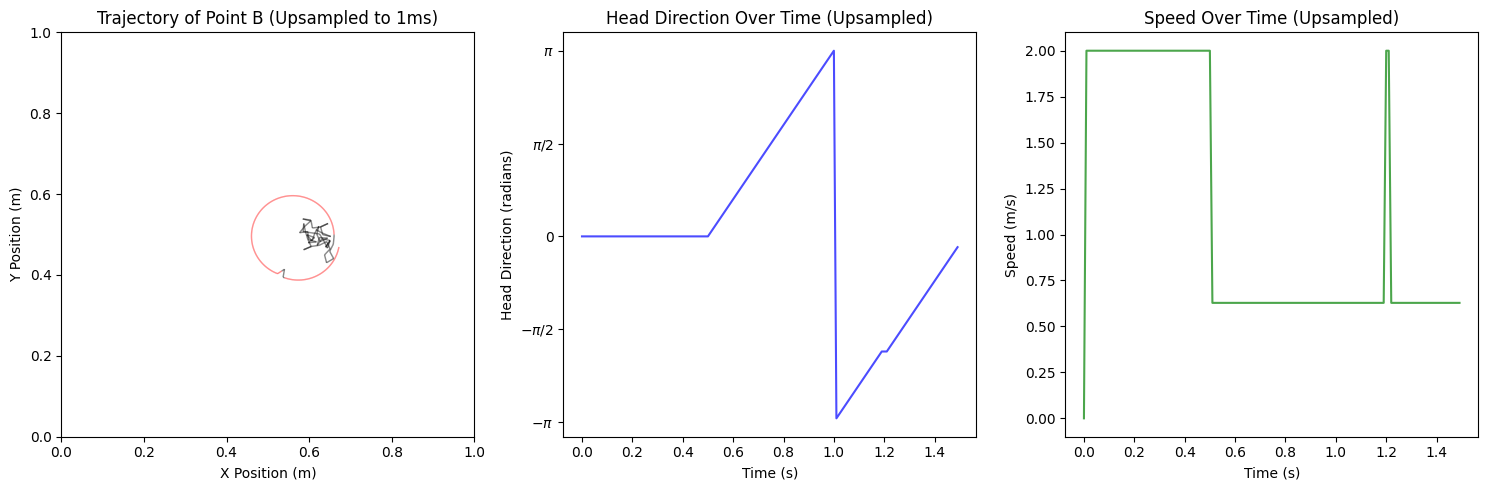

In [104]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from scipy.interpolate import interp1d

def simulate_honeycomb_movement(total_time=1, dt=0.01, move_prob=0.95, drift_factor=0.0, velocity=0.5, rotation_speed=np.pi / 50):
    """
    Simulates rat-like movement where a point (B) moves with random walks and rotations around a base point (A),
    ensuring time steps are correctly accounted for during rotation and then upsampled to 1ms resolution.

    Parameters:
        total_time (float): Total simulation time in seconds.
        dt (float): Time step size in seconds.
        move_prob (float): Probability of movement instead of rotation.
        drift_factor (float): Controls movement direction drift (0 = fully random, 1 = smooth drift).
        velocity (float): Speed of movement in m/s.
        rotation_speed (float): Angular speed per time step during rotation (radians per step).

    Returns:
        B_trajectory_upsampled (numpy array): Nx2 array of (x, y) positions of B (upsampled to 1ms).
        head_directions_upsampled (numpy array): Head direction angles (in radians, wrapped between -π and π).
        speeds_upsampled (numpy array): Speed of B at each time step (in m/s, upsampled).
        rotation_phases_upsampled (numpy array): Boolean array marking rotation phases (upsampled).
        time_upsampled (numpy array): Time points corresponding to the upsampled trajectory (seconds).
    """
    # Environment parameters
    env_size = 1.0  # 1m x 1m environment
    stick_length = 0.1  # 0.1m stick (hip-to-head distance)
    time_steps = int(total_time / dt)  # Convert total time to number of steps

    # Initialize positions at the center of the environment
    pos_A = np.array([env_size / 2, env_size / 2])
    angle = 0  # Initial head direction
    pos_B = pos_A + stick_length * np.array([np.cos(angle), np.sin(angle)])

    # Initialize movement direction
    move_angle = np.random.uniform(-np.pi, np.pi)

    # Store B trajectory, head directions, and movement markers
    B_trajectory = []
    head_directions = []
    rotation_phases = []
    time_list = []

    step_count = 0  # Track total simulation steps
    current_time = 0  # Initialize simulation time

    while step_count < time_steps:
        if np.random.rand() < move_prob:
            # Move in a direction with drift control
            move_angle = (drift_factor * move_angle) + ((1 - drift_factor) * np.random.uniform(-np.pi, np.pi))
            step_size = velocity * dt  # Distance moved per time step

            new_pos_A = pos_A + step_size * np.array([np.cos(move_angle), np.sin(move_angle)])

            # Keep within bounds
            new_pos_A = np.clip(new_pos_A, 0, env_size)

            # Update A and B positions
            pos_A = new_pos_A
            pos_B = pos_A + stick_length * np.array([np.cos(angle), np.sin(angle)])

            B_trajectory.append(pos_B.copy())
            head_directions.append(angle)
            rotation_phases.append(False)  # Movement phase
            time_list.append(current_time)

            step_count += 1  # Increment time step
            current_time += dt

        else:
            # Rotate B around A
            rotation_duration = int(np.random.uniform(0.6, 1.0) / dt)  # Random rotation duration (0.6 to 1.0 sec)
            for _ in range(min(rotation_duration, time_steps - step_count)):  # Ensure we don't exceed time_steps
                angle += rotation_speed  # Small angle increment per time step
                angle = (angle + np.pi) % (2 * np.pi) - np.pi  # Wrap between -π and π
                pos_B = pos_A + stick_length * np.array([np.cos(angle), np.sin(angle)])

                B_trajectory.append(pos_B.copy())
                head_directions.append(angle)
                rotation_phases.append(True)  # Rotation phase
                time_list.append(current_time)

                step_count += 1  # Increment time step
                current_time += dt
                if step_count >= time_steps:
                    break  # Stop when time limit is reached

    # Convert lists to numpy arrays for processing
    B_trajectory = np.array(B_trajectory)
    head_directions = np.array(head_directions)
    rotation_phases = np.array(rotation_phases)
    time_original = np.array(time_list)

    # Compute speed using finite differences
    displacement = np.linalg.norm(np.diff(B_trajectory, axis=0), axis=1)
    speeds = np.concatenate(([0], displacement / dt))  # Speed in m/s, prepend 0 for length consistency

    # Upsample to 1ms resolution
    dt_new = 0.001  # 1ms
    time_upsampled = np.arange(0, time_original[-1] + dt_new, dt_new)

    # Interpolation functions for upsampling
    interp_B_x = interp1d(time_original, B_trajectory[:, 0], kind='linear', fill_value="extrapolate")
    interp_B_y = interp1d(time_original, B_trajectory[:, 1], kind='linear', fill_value="extrapolate")
    interp_head_dir = interp1d(time_original, head_directions, kind='linear', fill_value="extrapolate")
    interp_speeds = interp1d(time_original, speeds, kind='linear', fill_value="extrapolate")  # Avoid last speed point

    # Apply interpolation
    B_trajectory_upsampled = np.vstack((interp_B_x(time_upsampled), interp_B_y(time_upsampled))).T
    head_directions_upsampled = interp_head_dir(time_upsampled)
    speeds_upsampled = interp_speeds(time_upsampled)  # Speed is one step shorter

    # Handle head direction wrapping (-π to π)
    head_directions_upsampled = (head_directions_upsampled + np.pi) % (2 * np.pi) - np.pi

    # Upsample rotation phases (binary nearest interpolation)
    interp_rotation = interp1d(time_original, rotation_phases, kind='nearest', fill_value="extrapolate")
    rotation_phases_upsampled = interp_rotation(time_upsampled).astype(bool)

    return B_trajectory_upsampled, head_directions_upsampled, speeds_upsampled, rotation_phases_upsampled, time_upsampled


# Seed for reproducibility
np.random.seed(0)

# Run the function to generate movement data
B_trajectory, head_directions, speeds, rotation_phases, time_upsampled = simulate_honeycomb_movement(total_time=1.5, dt=0.01, move_prob=0.95, velocity=2)

# **Now the function outputs data at 1ms resolution.**

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. XY Trajectory Plot (Upsampled)
segments = np.array([[B_trajectory[i], B_trajectory[i + 1]] for i in range(len(B_trajectory) - 1)])
colors = ['red' if rotation_phases[i] else 'black' for i in range(len(B_trajectory) - 1)]
lc = LineCollection(segments, colors=colors, linewidths=1, alpha=0.5)
axes[0].add_collection(lc)
axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 1)
axes[0].set_xlabel("X Position (m)")
axes[0].set_ylabel("Y Position (m)")
axes[0].set_title("Trajectory of Point B (Upsampled to 1ms)")

# 2. Head Direction Over Time (Upsampled)
axes[1].plot(time_upsampled, head_directions, color='blue', alpha=0.7)
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("Head Direction (radians)")
axes[1].set_title("Head Direction Over Time (Upsampled)")
axes[1].set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
axes[1].set_yticklabels([r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])

# 3. Speed Over Time (Upsampled)
axes[2].plot(time_upsampled, speeds, color='green', alpha=0.7)
axes[2].set_xlabel("Time (s)")
axes[2].set_ylabel("Speed (m/s)")
axes[2].set_title("Speed Over Time (Upsampled)")

# Adjust layout
plt.tight_layout()
plt.show()


In [96]:
# Run the function to generate movement data
B_trajectory, head_directions, speeds, rotation_phases, time_upsampled = simulate_honeycomb_movement(total_time=50, dt=0.01, move_prob=0.95, velocity=2)


In [100]:
pl

0.0